In [ ]:
# importing pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.interpolate import interp1d
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# making data frame from csv file
df = pd.read_csv(r"/content/titanic_dataset (1).csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# setting first name as index column
df.set_index('PassengerId', inplace = True)

In [ ]:
df.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [ ]:
df.shape

(891, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df['Age'].fillna(df['Age'].mode().values[0],inplace=True)
df['Cabin'].fillna(df['Cabin'].mode().values[0],inplace=True)
df['Embarked'].fillna(df['Embarked'].mode().values[0],inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

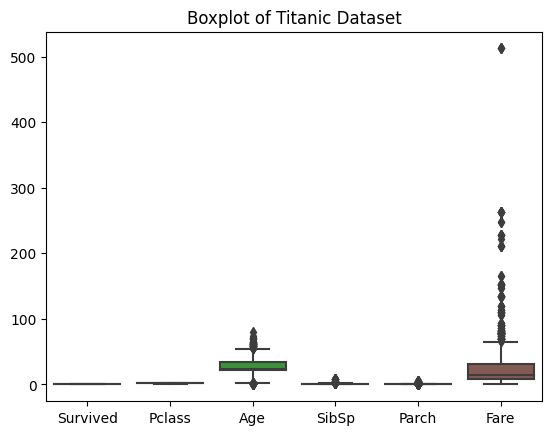

In [ ]:
#Boxplot
sns.boxplot(df)
plt.title("Boxplot of Titanic Dataset")
plt.show()

In [ ]:
#IQR OF AGE
q1 = np.percentile(df['Age'],25,interp1d=='midpoint')
q2 = np.percentile(df['Age'],50,interp1d=='midpoint')
q3 = np.percentile(df['Age'],75,interp1d=='midpoint')

print("Q1: ", q1)
print("Q2: ", q2)
print("Q3: ", q3)

Q1:  22.0
Q2:  24.0
Q3:  35.0


In [ ]:
IQR= q3-q1
low_lim = q1 - 1.5*IQR
up_lim = q3 + 1.5*IQR

print(low_lim)
print(up_lim)

2.5
54.5


In [ ]:
outlier = []
for x in df['Age']:
    if (x<low_lim) or (x>up_lim):
        outlier.append(x)

print("Outliers: ",outlier)
print("Number of Outliers: ",len(outlier))

Outliers:  [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]
Number of Outliers:  66


In [ ]:
#removing the oultiers
var= df['Age']> up_lim
df.loc[var].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [ ]:
df.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [ ]:
#IQR OF FARE
q1 = np.percentile(df['Fare'],25,interp1d=='midpoint')
q2 = np.percentile(df['Fare'],50,interp1d=='midpoint')
q3 = np.percentile(df['Fare'],75,interp1d=='midpoint')

print("Q1: ", q1)
print("Q2: ", q2)
print("Q3: ", q3)

Q1:  7.8958
Q2:  14.1083
Q3:  30.5


In [ ]:
IQR= q3-q1
low_lim = q1 - 1.5*IQR
up_lim = q3 + 1.5*IQR

print(low_lim)
print(up_lim)

-26.0105
64.4063


In [ ]:
outlier = []
for x in df['Fare']:
    if (x<low_lim) or (x>up_lim):
        outlier.append(x)

print("Outliers: ",outlier)
print("Number of Outliers: ",len(outlier))

Outliers:  [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 83.1583, 69.55, 89.1042, 164.8667, 69.55]
Number of Outliers:  108


In [ ]:
#removing the oultiers
var= df['Fare']> up_lim
df.loc[var].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=108)

In [ ]:
#Dropping the outlier values, but gthr values here is not visible
df.drop([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],inplace=True)

SyntaxError: ignored

In [ ]:
#IQR OF SibSp
q1 = np.percentile(df['SibSp'],25,interp1d=='midpoint')
q2 = np.percentile(df['SibSp'],50,interp1d=='midpoint')
q3 = np.percentile(df['SibSp'],75,interp1d=='midpoint')

print("Q1: ", q1)
print("Q2: ", q2)
print("Q3: ", q3)

Q1:  0.0
Q2:  0.0
Q3:  1.0


In [ ]:
IQR= q3-q1
low_lim = q1 - 1.5*IQR
up_lim = q3 + 1.5*IQR

print(low_lim)
print(up_lim)

-1.5
2.5


In [ ]:
outlier = []
for x in df['SibSp']:
    if (x<low_lim) or (x>up_lim):
        outlier.append(x)

print("Outliers: ",outlier)
print("Number of Outliers: ",len(outlier))

Outliers:  [3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]
Number of Outliers:  46


In [ ]:
#removing the oultiers
var= df['SibSp']> up_lim
df.loc[var].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [ ]:
df.drop([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace=True)

In [ ]:
#IQR OF Survived
q1 = np.percentile(df['Survived'],25,interp1d=='midpoint')
q2 = np.percentile(df['Survived'],50,interp1d=='midpoint')
q3 = np.percentile(df['Survived'],75,interp1d=='midpoint')

print("Q1: ", q1)
print("Q2: ", q2)
print("Q3: ", q3)

Q1:  0.0
Q2:  0.0
Q3:  1.0


In [ ]:
IQR= q3-q1
low_lim = q1 - 1.5*IQR
up_lim = q3 + 1.5*IQR

print(low_lim)
print(up_lim)

-1.5
2.5


In [ ]:
outlier = []
for x in df['Survived']:
    if (x<low_lim) or (x>up_lim):
        outlier.append(x)

print("Outliers: ",outlier)
print("Number of Outliers: ",len(outlier))

Outliers:  []
Number of Outliers:  0


In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
#Label ENCODING
le= LabelEncoder()
df['Name']=le.fit_transform(df['Name'])
df['Sex']=le.fit_transform(df['Sex'])
df['Ticket']=le.fit_transform(df['Ticket'])
df['Cabin']=le.fit_transform(df['Cabin'])
df['Embarked']=le.fit_transform(df['Embarked'])
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,94,1,22.0,1,0,493,7.2500,38,2
2,1,1,172,0,38.0,1,0,563,71.2833,68,0
3,1,3,321,0,26.0,0,0,633,7.9250,38,2
4,1,1,248,0,35.0,1,0,41,53.1000,45,2
5,0,3,15,1,35.0,0,0,446,8.0500,38,2


In [ ]:
#Preprocessing
X= df.drop('Survived', axis=1)
y= df.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
lr= LogisticRegression()
model= lr.fit(X_train,y_train)
y_pred= model.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7562189054726368

In [ ]:
min_max=MinMaxScaler(feature_range=(0,1))
X1=min_max.fit_transform(X)
type(X1)

numpy.ndarray

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
X1=pd.DataFrame(X1,columns=['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'])
X1.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.117207,1.0,0.402762,0.5,0.0,0.765528,0.014151,0.301587,1.0
1,0.0,0.214464,0.0,0.701381,0.5,0.0,0.874224,0.139136,0.539683,0.0
2,1.0,0.400249,0.0,0.477417,0.0,0.0,0.982919,0.015469,0.301587,1.0
3,0.0,0.309227,0.0,0.645390,0.5,0.0,0.063665,0.103644,0.357143,1.0
4,1.0,0.018703,1.0,0.645390,0.0,0.0,0.692547,0.015713,0.301587,1.0


In [ ]:
X1.describe()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,803.000000,803.000000,803.000000,803.000000,803.00000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,0.659402,0.500000,0.647572,0.509077,0.16127,0.053134,0.491700,0.059365,0.351223,0.760897
std,0.412698,0.289215,0.478024,0.199248,0.26861,0.127912,0.299020,0.095351,0.165630,0.400424
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.250000,0.000000,0.421426,0.00000,0.000000,0.221273,0.015412,0.301587,0.500000
50%,1.000000,0.500000,1.000000,0.440090,0.00000,0.000000,0.487578,0.025374,0.301587,1.000000
75%,1.000000,0.750000,1.000000,0.626726,0.50000,0.000000,0.761646,0.054311,0.301587,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
